## 003 - Join map matched data
#### This script  joins the map matched data to the road segments data. 

In [25]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
py.init_notebook_mode() # graphs charts inline (IPython)

import pandas as pd
import numpy as np
import os
from matplotlib import path
import csv
from datetime import datetime

# Read road segment data as csv file - ObjectID of road network dataset to join with map matched results
roads_df = pd.read_csv('C:/Data/road_segments.csv',sep=',')

In [26]:
# Map matched results divided by peak times in a weekday
am_peak_results = pd.read_csv('C:/Data/Output files/Monday25_04_am_peak.csv')
off_peak_results = pd.read_csv('C:/Data/Output files/Monday25_04_off_peak.csv')
pm_peak_results = pd.read_csv('C:/Data/Output files/Monday25_04_pm_peak.csv')
night_time_results = pd.read_csv('C:/Data/Output files/Monday25_04_night_time.csv')

In [27]:
list(am_peak_results)

['Unnamed: 0', 'OBJECTID', 'Freq', 'Avg_speed']

In [28]:
# Join data
dfs = [roads_df, am_peak_results, off_peak_results, pm_peak_results,night_time_results]

am_peak_results.name = 'am'
off_peak_results.name = 'off'
pm_peak_results.name = 'pm'
night_time_results.name = 'night'

df = dfs[0]
for df_ in dfs[1:]:
    suffix = ''.join(['_',df_.name])
    print suffix
    df = df.merge(df_, on='OBJECTID',how='left')
    df.rename(columns={'Freq': ''.join(['Freq',suffix]), 'Avg_speed' : ''.join(['Avg_speed',suffix])}, inplace=True)
    del df['Unnamed: 0']

_am
_off
_pm
_night


In [29]:
print df.count()
df

FID                206844
full_name          206844
subtpye_n          206844
t_hierarch         206844
dist_m             206844
OBJECTID           206844
Zone               206844
Freq_am             25763
Avg_speed_am        22607
Freq_off            25269
Avg_speed_off       21772
Freq_pm             36926
Avg_speed_pm        28793
Freq_night          22066
Avg_speed_night     19555
dtype: int64


,FID,full_name,subtpye_n,t_hierarch,dist_m,OBJECTID,Zone,Freq_am,Avg_speed_am,Freq_off,Avg_speed_off,Freq_pm,Avg_speed_pm,Freq_night,Avg_speed_night
0,0,EASTERN FREEWAY,Motorway,Highway,448,1.0,Outer Metro Melbourne,10.0,96.620675,11.0,77.078513,35.0,60.567509,28.0,91.672451
1,1,EASTERN FREEWAY,Motorway,Highway,448,2.0,Outer Metro Melbourne,6.0,98.878250,14.0,78.389907,35.0,42.523405,27.0,91.490008
2,2,DANDENONG-HASTINGS ROAD,Dual Carriageway,Highway,296,3.0,Outer Metro Melbourne,11.0,65.641541,4.0,28.773023,7.0,60.072881,5.0,79.862015
3,3,DANDENONG-HASTINGS ROAD,Dual Carriageway,Highway,296,4.0,Outer Metro Melbourne,15.0,63.155710,4.0,39.431461,7.0,50.740797,5.0,87.647324
4,4,KINGS-WEST GATE OUT RAMP ON,Entry/Exit Ramp,Highway,28,5.0,Inner Metro Melbourne,NaN,NaN,1.0,74.897080,3.0,88.094049,10.0,61.531670
5,5,HUME FREEWAY,Motorway,Highway,418,7.0,Outer Metro Melbourne,3.0,NaN,3.0,104.931681,NaN,NaN,NaN,NaN
6,6,WEST GATE FREEWAY,Motorway,Highway,119,8.0,Inner Metro Melbourne,9.0,76.646278,5.0,79.230035,8.0,78.094558,4.0,78.466284
7,7,PLENTY ROAD,Standard Road,Arterial Road,49,10.0,Outer Metro Melbourne,NaN,NaN,3.0,78.615018,NaN,NaN,NaN,NaN
8,8,POINT NEPEAN ROAD,Standard Road,Arterial Road,118,11.0,Outer Metro Melbourne,7.0,53.288036,1.0,65.180457,4.0,56.962068,NaN,NaN
9,9,DUNCANS ROAD,Standard Road,Arterial Road,77,12.0,Outer Metro Melbourne,2.0,46.877802,NaN,NaN,NaN,NaN,NaN,NaN


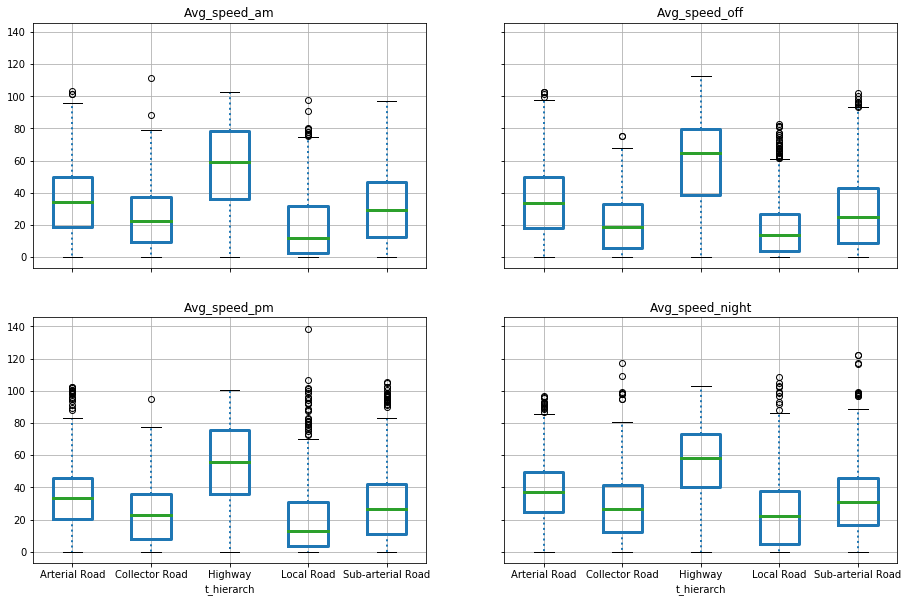

In [94]:
# Create boxplots charts to evaluate average results for speed values in different peak times
boxprops = dict(linestyle='-', linewidth=3, color='k')
medianprops = dict(linestyle='-', linewidth=3, color='k')
whiskerprops= dict(linestyle =':', linewidth = 2, color = 'k')
bp = df.loc[df['Zone'] == 'Inner Metro Melbourne'].boxplot(column = ['Avg_speed_am','Avg_speed_off','Avg_speed_pm','Avg_speed_night'],
                                                           by = 't_hierarch',
                                                           layout=(2,2),figsize=(15,10),
                                                           boxprops=boxprops, medianprops=medianprops,
                                                           whiskerprops = whiskerprops,
                                                           return_type='dict'  )
plt.suptitle("")
# Export plot 
plt.savefig('C:/Data/Output files/Inner_Melbourne_25April_Monday_results.png')

In [104]:
# Map matched results by road type in outern suburbs in Melbourne
group = df.loc[df['Zone'] == 'Outer Metro Melbourne'].groupby("t_hierarch")
summary_stats = group['Avg_speed_am'].describe()
summary_stats

,count,mean,std,min,25%,50%,75%,max
t_hierarch,,,,,,,,
Arterial Road,4448.0,49.631502,22.058642,0.0,36.694466,53.811395,64.845431,107.649578
Collector Road,980.0,34.669785,22.312986,0.0,16.463106,36.215740,51.234578,101.688627
Highway,4417.0,73.292911,27.375350,0.0,56.675955,80.825085,96.264070,122.894110
Local Road,2923.0,27.755072,23.997781,0.0,4.734410,24.930541,45.180299,115.478018
Sub-arterial Road,1488.0,51.216994,23.819107,0.0,38.005321,56.665472,67.436970,109.163204


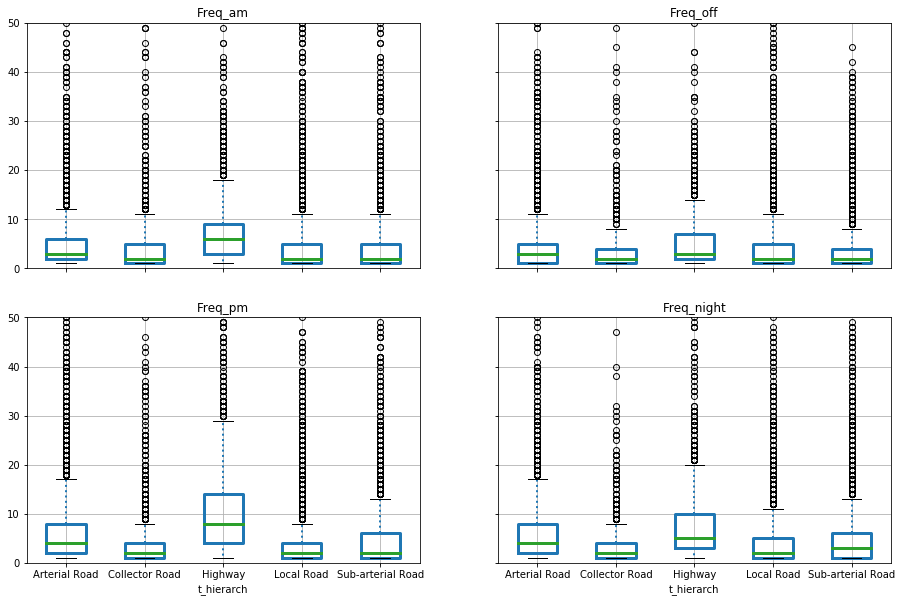

In [101]:
# Create boxplots charts frequency values in different peak times
boxprops = dict(linestyle='-', linewidth=3, color='k')
medianprops = dict(linestyle='-', linewidth=3, color='k')
whiskerprops= dict(linestyle =':', linewidth = 2, color = 'k')
bp = df.loc[df['Zone'] == 'Inner Metro Melbourne'].boxplot(column = ['Freq_am','Freq_off','Freq_pm','Freq_night'],
                                                           by = 't_hierarch',
                                                           layout=(2,2),figsize=(15,10),
                                                           boxprops=boxprops, medianprops=medianprops,
                                                           whiskerprops = whiskerprops,
                                                           return_type='dict'  )
plt.ylim([0,50])
plt.suptitle("")
plt.savefig('C:/Data/Output files/Inner_Melbourne_25April_Monday_freq.png')

In [105]:
group_2 = df.loc[df['Zone'] == 'Outer Metro Melbourne'].groupby("t_hierarch")
summary_stats = group_2['Freq_am'].describe()
summary_stats

,count,mean,std,min,25%,50%,75%,max
t_hierarch,,,,,,,,
Arterial Road,4892.0,4.453802,7.223094,1.0,1.0,2.0,5.0,170.0
Collector Road,1133.0,3.457193,7.440172,1.0,1.0,2.0,3.0,150.0
Highway,4593.0,6.695841,6.840838,1.0,2.0,4.0,9.0,127.0
Local Road,3699.0,11.358746,81.330128,1.0,1.0,2.0,5.0,2312.0
Sub-arterial Road,1685.0,3.037389,3.829242,1.0,1.0,2.0,3.0,52.0


In [ ]:
# Export joined results 
df.to_csv('C:/Data/Monday25_resuts.csv',encoding = 'utf-8')